### AIDM 7410
#### Part1 This is the pipeline for image color extraction / recognition / visualization.
-------------------------

Load the dataset and the images path


In [180]:
import pandas as pd

df_image = pd.read_csv("dfimageurlall.csv")

#The first color photo from the competition dates back to 1965, so we will explore the color characteristics of photos from 1965.
df_filtered_image = df_image[df_image['Award Year'] >= 1965]


In [181]:
df_filtered_image.head(5)

path_list = []

stored_paths = df_filtered_image.iloc[:, 6]
for index, row in df_filtered_image.iterrows():
    stored_path = row['Stored Path']
    path_list.append(stored_path)
print(path_list)

#put the all imagepath into the list

['F:\\Temp\\1965\\Eddie Adams\\1.jpg', 'F:\\Temp\\1965\\Erich Baumann\\1.jpg', 'F:\\Temp\\1965\\Manfred Rehm\\1.jpg', 'F:\\Temp\\1965\\James Bourdier\\3.jpg', 'F:\\Temp\\1965\\Rudi Herzog\\1.jpg', 'F:\\Temp\\1965\\James Bourdier\\6.jpg', 'F:\\Temp\\1965\\James Bourdier\\2.jpg', 'F:\\Temp\\1965\\Matt Herron\\2.jpg', 'F:\\Temp\\1965\\James Bourdier\\1.jpg', 'F:\\Temp\\1965\\Rolf Kreuder\\1.jpg', 'F:\\Temp\\1965\\Matt Herron\\3.jpg', 'F:\\Temp\\1965\\John Rooy\\1.jpg', 'F:\\Temp\\1965\\James Bourdier\\5.jpg', 'F:\\Temp\\1965\\Matt Herron\\4.jpg', 'F:\\Temp\\1965\\Matt Herron\\3.jpg', 'F:\\Temp\\1965\\Kyoichi Sawada\\1.jpg', 'F:\\Temp\\1965\\James Bourdier\\1.jpg', 'F:\\Temp\\1965\\Rolf Kreuder\\1.jpg', 'F:\\Temp\\1965\\Matt Herron\\2.jpg', 'F:\\Temp\\1965\\Freddy Lindström\\1.jpg', 'F:\\Temp\\1965\\Erich Baumann\\1.jpg', 'F:\\Temp\\1965\\László Fejes\\1.jpg', 'F:\\Temp\\1965\\Dieter Heggemann\\1.jpg', 'F:\\Temp\\1965\\Gerd Heidemann\\1.jpg', 'F:\\Temp\\1965\\Günter R. Reitz\\1.jpg', 'F:\\

ramdonly exract the color from a image

d:\anaconda\envs\tensorflow_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


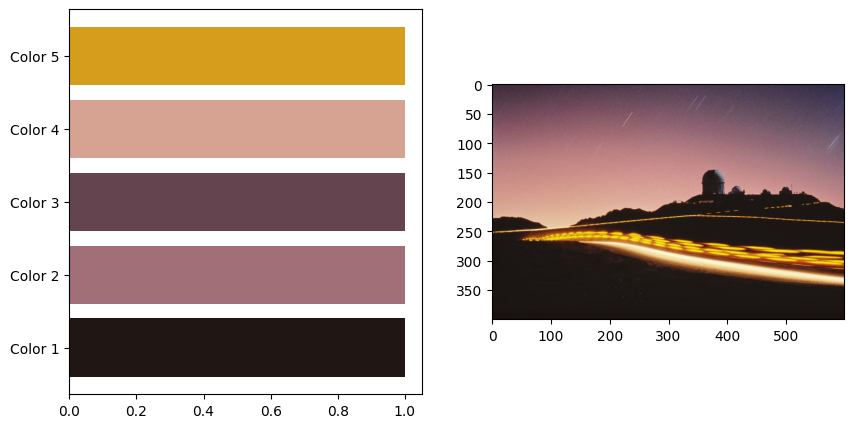

In [192]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# load the image
img = cv2.imread('F:\\Temp\\1994\Roger H. Ressmeyer\\6.jpg')

# translate it into RGB format
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# resize
img = cv2.resize(img, (600, 400))


data = img.reshape((-1, 3))

# firstly we try clusters = 5
kmeans = KMeans(n_clusters=5)

# train the model
kmeans.fit(data)

colors = kmeans.cluster_centers_.astype(int)

colors_ = colors / 255.0

# set two windows 
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

# show the bar chart
names = ['Color 1', 'Color 2', 'Color 3', 'Color 4', 'Color 5']
axes[0].barh(names, [1, 1, 1, 1, 1], color=colors_)

# show the original image
axes[1].imshow(img)

plt.show()



找到一个相对极端的例子

F:\Temp\2016\Tim Laman\8.jpg


d:\anaconda\envs\tensorflow_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 26  29  38]
 [  9   8  14]
 [183  85  65]
 [ 19  17  23]
 [ 95   7   8]]


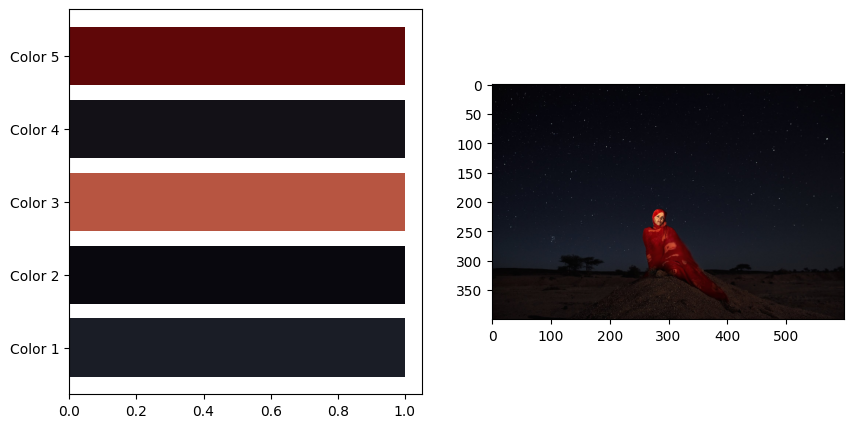

In [5]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 加载图像
img = cv2.imread(path_list[11126])
print(path_list[11126])
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 加载图像
img = cv2.imread('F:\\Temp\\2011\\andrew mcconnell\\1.jpg')

# 转换为RGB格式
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 调整图像尺寸
img = cv2.resize(img, (600, 400))

# 将图像数据转换为二维数组
data = img.reshape((-1, 3))

# 定义k-means聚类模型
kmeans = KMeans(n_clusters=5)

# 训练模型并进行颜色聚类
kmeans.fit(data)

# 提取聚类中心，即为最主要的3种颜色
colors = kmeans.cluster_centers_.astype(int)

# 打印颜色值
print(colors)

# 将颜色值转换为范围在 0 到 1 之间的值
colors_ = colors / 255.0

# 创建包含两个子图的图形窗口
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

# 在第一个子图中绘制水平条形图
names = ['Color 1', 'Color 2', 'Color 3', 'Color 4', 'Color 5']
axes[0].barh(names, [1, 1, 1, 1, 1], color=colors_)

# 在第二个子图中显示原始图片
axes[1].imshow(img)

# 显示图形
plt.show()



Q1： 为什么我们要设定 n = 5 ？

1. 避免过拟合。如果设置 n = 20, 提取的图片色彩可能并没有那么具有代表性，同时，我们也要保证图像信息能够合理获取。
2. 尽量节省运算时间。经过测试，n=5的情况下，本电脑429mins左右提取完所有照片的颜色

Q2：为什么用 k-means ？

我们使用k-means基于以下考量：
1. k-means的解释性强，他的聚类算法就决定了我们可以将算法合理应用于两种图像：1.对比度大的情况下仍能保留细节，即使这个颜色所占的整个画幅比例较小。例如上面的案例。2.暗角较多的照片也能应对。摄影师在拍摄上即使拍到了不同的颜色，但是由于照片物体之间的暗角存在，会让整张照片仍旧处于一种昏暗及压抑的情况，在读者的视觉理解下，会将颜色“平均化”，一定程度符合k-means的图像处理思路。


In [193]:
df_filtered_image.head(3)


,Index,Title,Award,Category,Published Date,URL,Stored Path,Description,Prize Level,Photographer,Award Year,Background,Story,Award Region,Award Category,Jury
197,1,Not Specified,1965 Photo Contest,News,"01 April, 1965",https://www.worldpressphoto.org/getmedia/f9fe5...,F:\Temp\1965\Eddie Adams\1.jpg,"Under sniper fire, a Vietnamese woman carries ...",3rd prize,Eddie Adams,1965,NaN,NaN,NaN,NaN,NaN
198,1,Not Specified,1965 Photo Contest,Color Picture,"19 July, 1964",https://www.worldpressphoto.org/getmedia/825c7...,F:\Temp\1965\Erich Baumann\1.jpg,The Formula One drivers experience a rainy sta...,1st prize,Erich Baumann,1965,NaN,NaN,NaN,NaN,NaN
199,1,Not Specified,1965 Photo Contest,General News,"01 January, 1965",https://www.worldpressphoto.org/getmedia/166bb...,F:\Temp\1965\Manfred Rehm\1.jpg,A circus goes on tour.,2nd prize,Manfred Rehm,1965,NaN,NaN,NaN,NaN,NaN


In [9]:
df_filtered_image.loc[:, 'colors_RGB'] = np.nan
df_filtered_image.head(5)

D:\Temp\ipykernel_60260\3449108761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_image.loc[:, 'colors_RGB'] = np.nan


,Index,Title,Award,Category,Published Date,URL,Stored Path,Description,Prize Level,Photographer,Award Year,Background,Story,Award Region,Award Category,Jury,colors_RGB
197,1,Not Specified,1965 Photo Contest,News,"01 April, 1965",https://www.worldpressphoto.org/getmedia/f9fe5...,F:\Temp\1965\Eddie Adams\1.jpg,"Under sniper fire, a Vietnamese woman carries ...",3rd prize,Eddie Adams,1965,NaN,NaN,NaN,NaN,NaN,NaN
198,1,Not Specified,1965 Photo Contest,Color Picture,"19 July, 1964",https://www.worldpressphoto.org/getmedia/825c7...,F:\Temp\1965\Erich Baumann\1.jpg,The Formula One drivers experience a rainy sta...,1st prize,Erich Baumann,1965,NaN,NaN,NaN,NaN,NaN,NaN
199,1,Not Specified,1965 Photo Contest,General News,"01 January, 1965",https://www.worldpressphoto.org/getmedia/166bb...,F:\Temp\1965\Manfred Rehm\1.jpg,A circus goes on tour.,2nd prize,Manfred Rehm,1965,NaN,NaN,NaN,NaN,NaN,NaN
200,3,Not Specified,1965 Photo Contest,General News,"27 September, 1965",https://www.worldpressphoto.org/getmedia/7ee84...,F:\Temp\1965\James Bourdier\3.jpg,A student is killed by a Dominican Army guard ...,Honorable Mention,James Bourdier,1965,NaN,NaN,NaN,NaN,NaN,NaN
201,1,Not Specified,1965 Photo Contest,Features,"01 January, 1965",https://www.worldpressphoto.org/getmedia/8af0e...,F:\Temp\1965\Rudi Herzog\1.jpg,Dutch father rides his bike.,3rd prize,Rudi Herzog,1965,NaN,NaN,NaN,NaN,NaN,NaN


我们首先使用cv的照片读取模式 cv2.imread(i) 

In [ ]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

n = 0
x=0

for i in path_list:
    if x < 12948:
        x = x + 1
        try:
            img = cv2.imread(i)  

            # 转换为RGB格式
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # 调整图像尺寸
            img = cv2.resize(img, (600, 400))

            # 将图像数据转换为二维数组
            data = img.reshape((-1, 3))

            # 定义k-means聚类模型
            kmeans = KMeans(n_clusters=5, random_state=42)

            # 训练模型并进行颜色聚类
            kmeans.fit(data)

            n = n + 1
            print("exacting the color... the picture is No.",n)
            print(i)

            colors = kmeans.cluster_centers_.astype(int)
            df_filtered_image['colors_RGB'] = colors.tolist()


        except:
            n = n + 1
            print("path_error at the photo No.",n)


    else: 
        break
        

经过试验，图片查看方式将不会使用CV，因为会对一些特殊字符不兼容（例如匈牙利文姓名等等）

In [ ]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import pandas as pd
from PIL import Image

# 创建一个新的数据框来保存处理过的图像数据
df_images_RGB = pd.DataFrame()

n = 0
x = 0

for i in path_list:
    if x < 12950:
        x = x + 1
        try:
            img = Image.open(i)

            # 转换为RGB格式
            img = img.convert('RGB')

            # 调整图像尺寸
            img = img.resize((600, 400))

            # 将图像数据转换为二维数组
            data = np.array(img).reshape((-1, 3))

            # 定义k-means聚类模型
            kmeans = KMeans(n_clusters=5, random_state=42)

            # 训练模型并进行颜色聚类
            kmeans.fit(data)

            # 将处理过的图像数据保存到一个新的数据框中
            colors = kmeans.cluster_centers_.astype(int)

            df_images_RGB = df_images_RGB.append(
                pd.DataFrame({'initial index': [df_filtered_image.index[n]],'Path': [i], 'Colors_RGB': [colors.tolist()]}),
                ignore_index=True)
            
            n = n + 1
            print("Extracting colors from photo No.", n)
            print(i)

        except Exception as e:
            
            print("Error processing photo No.", n)
            df_images_RGB = df_images_RGB.append(
                pd.DataFrame({'initial index': [df_filtered_image.index[n]],'Path': [i]}),
                ignore_index=True)
            
            n = n + 1
            print(e)

    else:
        break

# 将处理过的数据框保存为CSV文件
df_images_RGB.to_csv('images_RGBs.csv', index=False)

In [200]:
print(df_images_RGB.head(3))
df_images_RGB.to_csv('images_RGBs.csv', index=False)

   initial index                              Path  \
0            197    F:\Temp\1965\Eddie Adams\1.jpg   
1            198  F:\Temp\1965\Erich Baumann\1.jpg   
2            199   F:\Temp\1965\Manfred Rehm\1.jpg   

                                          Colors_RGB  
0  [[112, 112, 109], [156, 157, 153], [27, 27, 27...  
1  [[192, 164, 153], [86, 72, 67], [35, 29, 26], ...  
2  [[92, 92, 92], [183, 183, 183], [239, 239, 239...  


最终，将1.2W+的照片的每张照片top5颜色存入csv中

-----------------------------------------

In [201]:
df_image = pd.read_csv("images_RGBs.csv")
df_filtered_image_RGBs = df_image


In [202]:
df_filtered_image_RGBs
df_filtered_image_RGBs.dropna(subset=['Colors_RGB'], inplace=True)
df_filtered_image_RGBs.head(3)

,initial index,Path,Colors_RGB
0,197,F:\Temp\1965\Eddie Adams\1.jpg,"[[112, 112, 109], [156, 157, 153], [27, 27, 27..."
1,198,F:\Temp\1965\Erich Baumann\1.jpg,"[[192, 164, 153], [86, 72, 67], [35, 29, 26], ..."
2,199,F:\Temp\1965\Manfred Rehm\1.jpg,"[[92, 92, 92], [183, 183, 183], [239, 239, 239..."


In [203]:
import numpy as np
from sklearn.cluster import KMeans
import ast

# 将所有RGB颜色存储到一个数组中
colors = []
for row in df_filtered_image_RGBs['Colors_RGB']:
    row = ast.literal_eval(row)
    for color in row:
        colors.append(color)

# 转换成NumPy数组
colors = np.array(colors)

# 执行k-means聚类
kmeans = KMeans(n_clusters=80, random_state=0).fit(colors)

# 输出聚类结果
print(kmeans.labels_)


d:\anaconda\envs\tensorflow_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[41 26 23 ...  1  8 15]


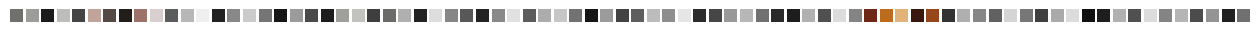

In [205]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 80, figsize=(16, 4))

for i in range(80):
    color = colors[i]
    #print(f"colors {i+1}：{color}")
    axes[i].imshow([[(color / 255).tolist()]], interpolation='nearest')
    axes[i].axis('off')
    
plt.show()


这是将6W+颜色进行k-means聚类的初步探索。如果将RGB颜色当成三维坐标打印出来，我们可以发现这80个最集中的簇，主要还是集中在黑白灰色。当然颜色特征也有橙黄色/咖啡色色系的（因为是经过平均后的色彩，所以这次探索并不能直接说明最常用的颜色具体是哪一种，但是可以知道是哪一类）

In [163]:
''''import colorspacious

def get_color_category(color):
    # 定义颜色大类
    color_categories = ['红', '橙', '黄', '绿', '蓝', '黑', '白']

    # 将 RGB 颜色转换为 Lab 颜色空间
    lab_color = colorspacious.cspace_convert(color, "sRGB255", "CAM02-UCS")

    # 判断颜色属于哪个大类
    if lab_color[0] < 10 and lab_color[1] < 10 and lab_color[2] < 10:
        category = '黑'
    elif lab_color[0] > 70 and lab_color[1] < 20 and lab_color[2] < 20:
        category = '白'
    elif lab_color[0] > 55 and lab_color[1] > 20 and lab_color[2] > 35:
        category = '黄'
    elif lab_color[0] > 30 and lab_color[1] < -10 and lab_color[2] > 20:
        category = '绿'
    elif lab_color[0] > 30 and lab_color[1] < -20 and lab_color[2] < -30:
        category = '蓝'
    elif lab_color[0] > 25 and lab_color[1] > 15 and lab_color[2] < -15:
        category = '红'
    elif lab_color[0] > 20 and lab_color[1] < 15 and lab_color[2] > 20:
        category = '橙/橙黄'
    else:
        category = '黑'

    return category
''''

这是经过多次调节，色彩分类后的区间
我们首先设置了红色和黄色的搭配，经过初次试验发现大多数颜色往往会被定义在红色&黄色区间内，所以我们新增了一个橙色label

*这里我们使用了lab_color编码，因为理论上来说相比RGB能更贴近人的视觉理解，由于针对前面k-means 80和簇的预调查和照片预先筛选检验，我们略微放宽了对于橙色的宽容度（基于摄影色彩技术的考量，红色在摄影艺术处理或者胶片的因素（例如柯达胶卷）会略微偏橙一些）

In [206]:
import colorspacious

def get_color_category(color):
    # 定义颜色大类
    color_categories = ['red', 'orange', 'yellow', 'green', 'blue', 'black', 'white']

    # 将 RGB 颜色转换为 Lab 颜色空间
    lab_color = colorspacious.cspace_convert(color, "sRGB255", "CAM02-UCS")

    # 判断颜色属于哪个大类
    if lab_color[0] < 10 and lab_color[1] < 10 and lab_color[2] < 10:
        category = 'black'
    elif lab_color[0] > 70 and lab_color[1] < 20 and lab_color[2] < 20:
        category = 'white'
    elif lab_color[0] > 55 and lab_color[1] > 20 and lab_color[2] > 35:
        category = 'yellow'
    elif lab_color[0] > 20 and lab_color[1] < -10 and lab_color[2] < 0:
        category = 'blue'
    elif lab_color[0] > 30 and lab_color[1] < -10 and lab_color[2] > 20:
        category = 'green'
    elif lab_color[0] > 25 and lab_color[1] > 15 and lab_color[2] < -15:
        category = 'red'
    elif lab_color[0] > 20 and lab_color[1] < 15 and lab_color[2] > 20:
        category = 'orange'
    else:
        category = 'black'

    return category


In [179]:
import ast
import pandas as pd

all_color_categories = []

for colors_rgb in df_filtered_image_RGBs['Colors_RGB']:
    colors_rgb = ast.literal_eval(colors_rgb)
    color_categories = []
    for color in colors_rgb:
        category = get_color_category(color)
        color_categories.append(category)
    all_color_categories.append(color_categories)

df_colors = pd.DataFrame(all_color_categories, columns=['Color1', 'Color2', 'Color3', 'Color4', 'Color5'])
df_colors.rename(columns={'Color1': 'New_Column_Name'}, inplace=True)
df_colors.insert(0, 'initial index', df_filtered_image_RGBs['initial index'].values)
df_colors.insert(1, 'Path', df_filtered_image_RGBs['Path'].values)


df_colors.to_csv('color_categories.csv', index=False)


In [95]:
import pandas as pd

# 将 color_categorie 转换为 pandas 数据框
df_colors = pd.DataFrame(color_categories, columns=['Colors'])

# 将数据框保存到 CSV 文件中
df_colors.to_csv('colors.csv', index=False)

--------------------------------

In [137]:
import numpy as np
from sklearn.cluster import KMeans
import ast

# 将所有RGB颜色存储到一个数组中
colors = []
for row in df_filtered_image_RGBs['Colors_RGB']:
    row = ast.literal_eval(row)
    for color in row:
        colors.append(color)

# 转换成NumPy数组
colors = np.array(colors)
colors

array([[112, 112, 109],
       [156, 157, 153],
       [ 27,  27,  27],
       ...,
       [ 44,  47,  42],
       [194, 191, 188],
       [ 89,  87,  79]])

随后，我们将所有照片的 top5 色彩以像素点的方式在时间维度上打印在同一张照片中，查找一定的规律

In [207]:
from PIL import Image

# 定义图像的宽和高
width = 400
height = 150

# 定义每个像素块的宽和高
block_size = 20

# 创建一个空图像对象
image = Image.new("RGB", (width * block_size, height * block_size))

# 将RGB值列表转换为像素块并将其放置在图像上
for y in range(height):
    for x in range(width):
        # 计算当前像素的索引
        index = y * width + x
        if index >= len(colors):
            break
        # 从RGB列表中获取当前像素的颜色值
        color = tuple(colors[index])
        # 将颜色值转换为像素块，并将其放置在图像上
        block_image = Image.new("RGB", (block_size, block_size), color)
        x_pos = x * block_size
        y_pos = y * block_size
        image.paste(block_image, (x_pos, y_pos))

# 调整图像大小
new_size = (width * block_size, height * block_size)
image = image.resize(new_size)

# 显示图像
image.show()

# 保存图像
image.save("output.png")


初次探索的图片并不清楚，我们将一些明度不高的近似白色的像素粒设置为黑色（因为都是黑白照片类的）

In [208]:
from PIL import Image

# 定义图像的宽和高
width = 400
height = 150

# 定义每个像素块的宽和高
block_size = 20

# 创建一个空图像对象
image = Image.new("RGB", (width * block_size, height * block_size))

# 将RGB值列表转换为像素块并将其放置在图像上
for y in range(height):
    for x in range(width):
        # 计算当前像素的索引
        index = y * width + x
        if index >= len(colors):
            break
        # 从RGB列表中获取当前像素的颜色值
        color = tuple(colors[index])
        # 判断当前像素是否为近似白色
        brightness = sum(color) / 3.0
        if all(c >= 97 for c in color):
            color = (0, 0, 0)  # 将近似白色的像素设为黑色
        # 将颜色值转换为像素块，并将其放置在图像上
        block_image = Image.new("RGB", (block_size, block_size), color)
        x_pos = x * block_size
        y_pos = y * block_size
        image.paste(block_image, (x_pos, y_pos))

# 调整图像大小
new_size = (width * block_size, height * block_size)
image = image.resize(new_size)

# 显示图像
image.show()

# 保存图像
image.save("output.png")
